# Kmeans Clustering - Iris Dataset 

In [36]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,35 secs
H2O cluster version:,3.10.0.9
H2O cluster version age:,8 months and 30 days !!!
H2O cluster name:,H2O_from_python_unknownUser_xvlqsv
H2O cluster total nodes:,1
H2O cluster free memory:,6.626 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [37]:
iris = h2o.import_file(path='iris_wheader.csv')
iris.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:150
Cols:5




,sepal_len,sepal_wid,petal_len,petal_wid,class
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,0.0
mean,5.843333333333334,3.0539999999999994,3.758666666666667,1.1986666666666668,NaN
maxs,7.9,4.4,6.9,2.5,2.0
sigma,0.8280661279778637,0.4335943113621737,1.7644204199522624,0.7631607417008414,NaN
zeros,0,0,0,0,50
missing,0,0,0,0,0
0,5.1000000000000005,3.5,1.4000000000000001,0.2,Iris-setosa
1,4.9,3.0,1.4000000000000001,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [16]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [17]:
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]

In [18]:
for estimator in results:
    estimator.train(x=iris.col_names[0:-1], training_frame = iris)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [19]:
clusters = 4

In [20]:
predicted = results[clusters-2].predict(iris)
iris['Predicted']=predicted['predict'].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


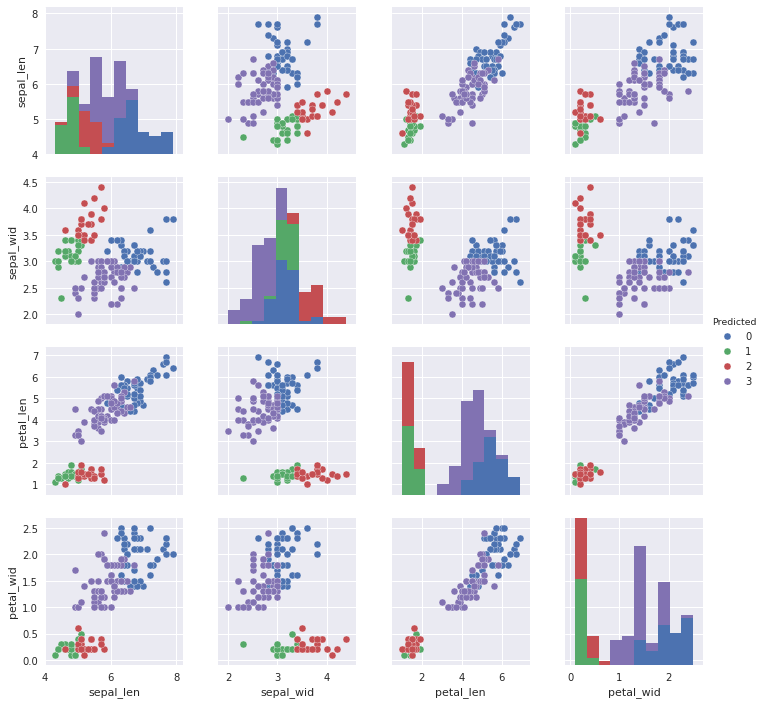

In [21]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.pairplot(iris.as_data_frame(True), vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"],  hue="Predicted");

# Deep Learning - Prostate Cancer Dataset

In [38]:
prostate = h2o.import_file(path="prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [39]:
prostate.describe()

Rows:380
Cols:9




,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,0.4026315789473684,66.03947368421049,1.0868421052631572,2.2710526315789488,1.1078947368421048,15.408631578947375,15.812921052631573,6.3842105263157904
maxs,380.0,1.0,79.0,2.0,4.0,2.0,139.70000000000002,97.60000000000001,9.0
sigma,109.84079387914127,0.4910743389630552,6.527071269173311,0.3087732580252793,1.0001076181502861,0.3106564493514939,19.99757266856046,18.347619967271175,1.0919533744261092
zeros,0,227,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0.0,65.0,1.0,2.0,1.0,1.4000000000000001,0.0,6.0
1,2.0,0.0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0.0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [40]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
prostate["CAPSULE"] = prostate["CAPSULE"].asfactor()
model = H2ODeepLearningEstimator(activation = "Tanh", hidden = [10, 10, 10], epochs = 10000)
model.train(x = list(set(prostate.columns) - set(["ID","CAPSULE"])), y ="CAPSULE", training_frame = prostate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [45]:
model.show()

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1501752412747_1
Status of Neuron Layers: predicting CAPSULE, 2-class classification, bernoulli distribution, CrossEntropy loss, 322 weights/biases, 8.5 KB, 2,933,600 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,7,Input,0.0,,,,,,,,,
,2,10,Tanh,0.0,0.0,0.0,0.0084123,0.0087283,0.0,-0.0392631,0.9764957,-0.2311704,0.6339996
,3,10,Tanh,0.0,0.0,0.0,0.0250064,0.0245677,0.0,0.0676371,0.9329109,-0.1913451,0.9134653
,4,10,Tanh,0.0,0.0,0.0,0.0681414,0.0867704,0.0,-0.0816308,1.5619226,-0.2738558,0.5290778
,5,2,Softmax,,0.0,0.0,0.0531388,0.0496194,0.0,0.1488604,5.1375427,-0.0095150,0.2040449




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0029911667306611964
RMSE: 0.05469155995819827
LogLoss: 0.008930610217649277
Mean Per-Class Error: 0.0032679738562091387
AUC: 0.9999424145575998
Gini: 0.9998848291151996
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9578557938219074: 


,0,1,Error,Rate
0,227.0,0.0,0.0,(0.0/227.0)
1,1.0,152.0,0.0065,(1.0/153.0)
Total,228.0,152.0,0.0026,(1.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9578558,0.9967213,87.0
max f2,0.1637454,0.9973924,90.0
max f0point5,0.9578558,0.9986859,87.0
max accuracy,0.9578558,0.9973684,87.0
max precision,1.0000000,1.0,0.0
max recall,0.1637454,1.0,90.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9578558,0.9945385,87.0
max min_per_class_accuracy,0.9578558,0.9934641,87.0
max mean_per_class_accuracy,0.9578558,0.9967320,87.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0131579,1.0,2.4836601,2.4836601,1.0,1.0,0.0326797,0.0326797,148.3660131,148.3660131
,2,0.0210526,1.0000000,2.4836601,2.4836601,1.0,1.0,0.0196078,0.0522876,148.3660131,148.3660131
,3,0.0315789,1.0000000,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,1.0000000,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,1.0000000,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,1.0000000,2.4836601,2.4836601,1.0,1.0,0.1241830,0.2483660,148.3660131,148.3660131
,7,0.15,0.9999999,2.4836601,2.4836601,1.0,1.0,0.1241830,0.3725490,148.3660131,148.3660131
,8,0.2,0.9999969,2.4836601,2.4836601,1.0,1.0,0.1241830,0.4967320,148.3660131,148.3660131
,9,0.3,0.9998906,2.4836601,2.4836601,1.0,1.0,0.2483660,0.7450980,148.3660131,148.3660131
,10,0.4,0.7337680,2.4836601,2.4836601,1.0,1.0,0.2483660,0.9934641,148.3660131,148.3660131



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-08-03 09:27:59,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2017-08-03 09:28:00,2.311 sec,3826 obs/sec,10.0,1,3800.0,0.4383376,0.6015113,0.8148052,2.4836601,0.2447368
,2017-08-03 09:28:05,7.204 sec,14971 obs/sec,220.0,22,83600.0,0.3323749,0.3453434,0.9243903,2.4836601,0.1421053
,2017-08-03 09:28:10,12.096 sec,16117 obs/sec,440.0,44,167200.0,0.2818658,0.2534749,0.9672339,2.4836601,0.0921053
,2017-08-03 09:28:15,17.202 sec,17052 obs/sec,690.0,69,262200.0,0.2184657,0.1560456,0.9849126,2.4836601,0.0605263
---,---,---,---,---,---,---,---,---,---,---,---
,2017-08-03 09:31:20,3 min 22.308 sec,13978 obs/sec,7250.0,725,2755000.0,0.0654276,0.0123849,0.9999424,2.4836601,0.0026316
,2017-08-03 09:31:26,3 min 28.532 sec,13939 obs/sec,7420.0,742,2819600.0,0.0896063,0.0359095,0.9993090,2.4836601,0.0078947
,2017-08-03 09:31:36,3 min 38.193 sec,13700 obs/sec,7630.0,763,2899400.0,0.1265279,0.0740296,0.9992514,2.4836601,0.0052632
,2017-08-03 09:31:44,3 min 45.896 sec,13380 obs/sec,7720.0,772,2933600.0,0.0871607,0.0228689,0.9998848,2.4836601,0.0052632



See the whole table with table.as_data_frame()


In [46]:
predictions=model.predict(prostate)
predictions.show()

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1
0,1,3.01245e-08
0,0.999942,5.7529e-05
0,1,2.6357e-15
0,1,1.19706e-10
0,1,1.7787e-15
1,2.04274e-13,1
0,1,9.97066e-13
0,1,7.83266e-11
0,0.998961,0.00103888
0,1,1.32607e-13
